(kane-mele-nb)=
# Kane-Mele model HWFs

This example uses the Kane-Mele model, a two-dimensional
topological insulator that exhibits spin-orbit coupling and
non-trivial topological properties. The examples demonstrate
how to define the model, compute its band structure, and compute 
the 1D Wannier centers along $x$ as a function of $k_y$,
illustrating the determination of the $Z_2$ invariant.


In [3]:
from pythtb import WFArray, Mesh
from pythtb.models import kane_mele
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_kane_mele(topological):
    "Return a Kane-Mele model in the normal or topological phase."

    # set model parameters depending on whether you are in the topological
    # phase or not
    if topological == "even":
        esite = 2.5
    elif topological == "odd":
        esite = 1.0

    # set other parameters of the model
    thop = 1.0
    spin_orb = 0.6 * thop * 0.5
    rashba = 0.25 * thop

    ret_model = kane_mele(esite, thop, spin_orb, rashba)

    return ret_model

In [4]:
model_triv = get_kane_mele("even")
model_topo = get_kane_mele("odd")

In [7]:
 # list of nodes (high-symmetry points) that will be connected
path = [
    [0.0, 0.0],
    [2.0 / 3.0, 1.0 / 3.0],
    [0.5, 0.5],
    [1.0 / 3.0, 2.0 / 3.0],
    [0.0, 0.0],
]

# labels of the nodes
label = (r"$\Gamma $", r"$K$", r"$M$", r"$K^\prime$", r"$\Gamma $")
(k_vec, k_dist, k_node) = model_topo.k_path(path, 201, report=False)

Text(0, 0.5, 'Energy')

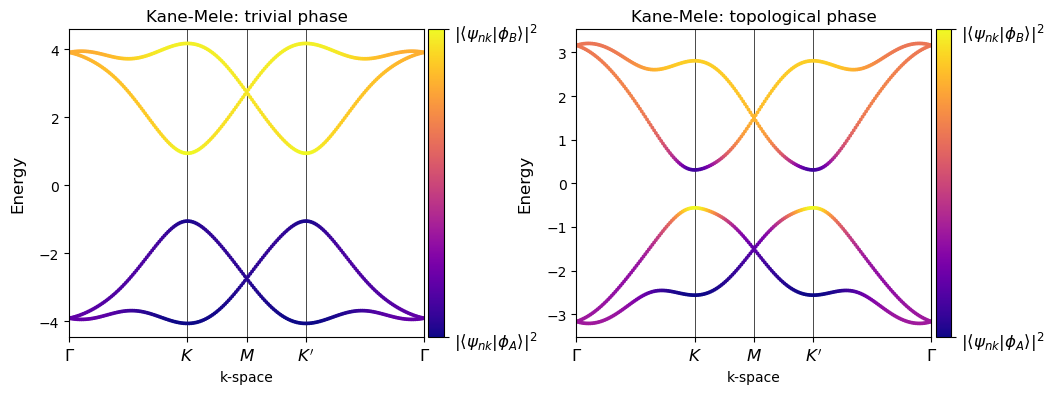

In [16]:
# initialize figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# solve for eigenenergies of hamiltonian on k_path and plot bands
model_triv.plot_bands(k_path=path, nk=201, k_label=label, fig=fig, ax=ax1, proj_orb_idx=[0])
model_topo.plot_bands(k_path=path, nk=201, k_label=label, fig=fig, ax=ax2, proj_orb_idx=[0])

ax1.set_title("Kane-Mele: trivial phase")
ax1.set_xlabel("k-space")
ax1.set_ylabel("Energy")

ax2.set_title("Kane-Mele: topological phase")
ax2.set_xlabel("k-space")
ax2.set_ylabel("Energy")

In [17]:
# calculate my-array
mesh = Mesh(model_topo)
mesh.build_grid(shape_k=(41, 41), gamma_centered=True, full_grid=True)

wf_array_topo = WFArray(model_topo, mesh)
wf_array_topo.solve_k_mesh()

wf_array_triv = WFArray(model_triv, mesh)
wf_array_triv.solve_k_mesh()

Imposing PBC in direction 0 along mesh and 0-th k-component
Imposing PBC in direction 1 along mesh and 1-th k-component
Imposing PBC in direction 0 along mesh and 0-th k-component
Imposing PBC in direction 1 along mesh and 1-th k-component


Calculate Berry phases around the BZ in the $k_x$ direction. This can be interpreted as the 1D hybrid Wannier centers in the $x$ direction and plotted as a function of $k_y$. Following the ideas in _A.A. Soluyanov and D. Vanderbilt, PRB 83, 235401 (2011) and R. Yu, X.L. Qi, A. Bernevig, Z. Fang and X. Dai, PRB 84, 075119 (2011)_, the connectivity of these curves determines the $Z_2$ index.

In [19]:
wan_cent_topo = wf_array_topo.berry_phase([0, 1], dir=1, contin=True, berry_evals=True)
wan_cent_topo /= 2 * np.pi

wan_cent_triv = wf_array_triv.berry_phase([0, 1], dir=1, contin=True, berry_evals=True)
wan_cent_triv /= 2 * np.pi

Text(0.5, 1.0, '1D Wannier centers: topological phase')

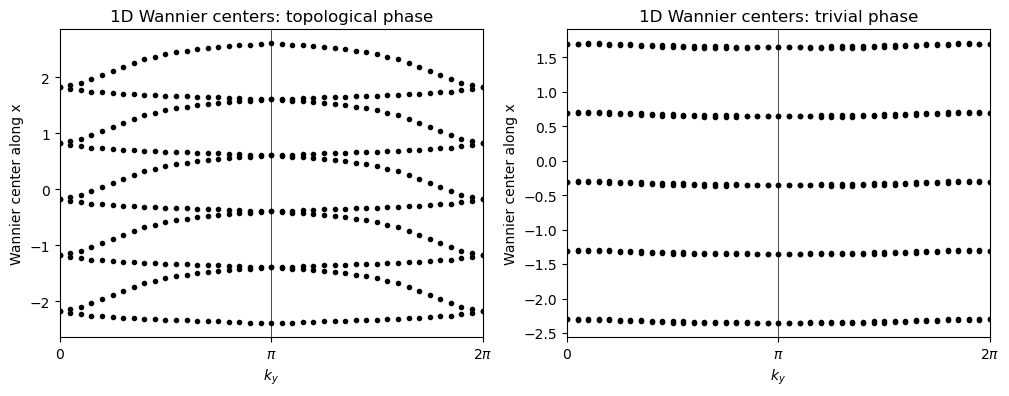

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# trivial
nky = wan_cent_triv.shape[0]
ky = np.linspace(0.0, 1.0, nky)
# draw shifted Wannier center positions
for shift in range(-2, 3):
    ax[1].plot(ky, wan_cent_triv[:, 0] + float(shift), "k.")
    ax[1].plot(ky, wan_cent_triv[:, 1] + float(shift), "k.")
# ax[1].set_ylim(-1.0, 1.0)
ax[1].set_ylabel("Wannier center along x")
ax[1].set_xlabel(r"$k_y$")
ax[1].set_xticks([0.0, 0.5, 1.0])
ax[1].set_xlim(0.0, 1.0)
ax[1].set_xticklabels([r"$0$", r"$\pi$", r"$2\pi$"])
ax[1].axvline(x=0.5, linewidth=0.5, color="k")
ax[1].set_title("1D Wannier centers: trivial phase")

# topological
nky = wan_cent_topo.shape[0]
ky = np.linspace(0.0, 1.0, nky)
# draw shifted Wannier center positions
for shift in range(-2, 3):
    ax[0].plot(ky, wan_cent_topo[:, 0] + float(shift), "k.")
    ax[0].plot(ky, wan_cent_topo[:, 1] + float(shift), "k.")
# ax[0].set_ylim(-1.0, 1.0)
ax[0].set_ylabel("Wannier center along x")
ax[0].set_xlabel(r"$k_y$")
ax[0].set_xticks([0.0, 0.5, 1.0])
ax[0].set_xlim(0.0, 1.0)
ax[0].set_xticklabels([r"$0$", r"$\pi$", r"$2\pi$"])
ax[0].axvline(x=0.5, linewidth=0.5, color="k")
ax[0].set_title("1D Wannier centers: topological phase")